# LOGISTIC REGRESSION USING TITANIC DATASET

<b>PROBLEM STATEMENT</b>

*The sinking of the Titanic is one of the most infamous shipwrecks in history.*

*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

*While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.*

*In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).*

https://www.kaggle.com/c/titanic/overview



### DOWNLOAD THE DATA

In [1]:
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 3.07MB/s]


In [2]:
!ls

LogisticRegression.ipynb README.md                titanic.zip


In [3]:
#Unzip the file
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
!ls

LogisticRegression.ipynb gender_submission.csv    titanic.zip
README.md                test.csv                 train.csv


### READ THE DATA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Data Dictionary</b>

| Variable | Definition | Definition |
| --- | --- | --- |
| survival	| Survival | 0 = No, 1 = Yes|
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex	| Sex |	
|Age	| Age in years |	
|sibsp	| # of siblings / spouses aboard the Titanic |
|parch	| # of parents / children aboard the Titanic |
|ticket	| Ticket number	|
|fare	| Passenger fare |	
|cabin	| Cabin number	|
|embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

<b>Variable Notes</b>
    
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### DATA CLEANING
Check for missing values

In [10]:
# count of data missing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's fix Age, Cabin, Embarked.

1. Age - Missing values

In [11]:
#percentage of data missing from "Age" column
(df['Age'].isnull().sum()/df.shape[0])*100

19.865319865319865

In [12]:
#fill missing values with median
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)

2. Cabin - Missing values

In [13]:
#percentage of data missing from "Cabin" column
(df['Cabin'].isnull().sum()/df.shape[0])*100

77.10437710437711

There's lot of data missing in Cabin, filling the missing value is not wise.

3. Embarked - Missing values

In [14]:
#percentage of data missing from "Embarked" column
(df['Embarked'].isnull().sum()/df.shape[0])*100

0.22446689113355783

In [15]:
#fill missing values with mode
df["Embarked"].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

<u><b>Hypothesis</b></u>

1. Women were likely to survive than men.
2. Children were more likely to survive.
3. Upper class passengers were more likely to survive.

Let's visualize the count of passengers who survived and who didn't.

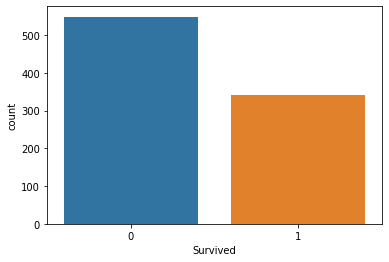

In [17]:
sns.countplot(x='Survived',data=df)

In [18]:
#Male count on Titanic
df["Sex"].loc[df["Sex"] == "male"].count()

577

Let's visualize the count of how many men survived

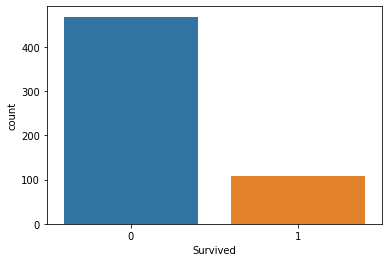

In [19]:
sns.countplot(x='Survived',data=df.loc[df["Sex"] == "male"])

In [20]:
#Female count on Titanic
df["Survived"].loc[df["Sex"] == "female"].count()

314

Let's visualize the count of how many women survived

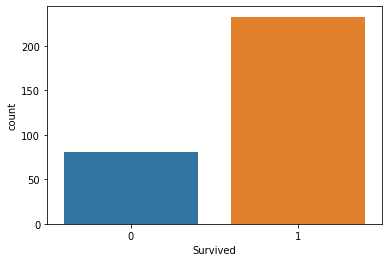

In [21]:
sns.countplot(x='Survived',data=df.loc[df["Sex"] == "female"])

We can observe that our <b><i>Hypothesis 1</i></b> is true.

Let's visualize the <i><u>age</u></i> of passengers. 

Before that we shall create a column <i>"Minor"</i>, which will have 1 if the age < 16, else 0.

In [22]:
df['Minor'] = np.where(df['Age']<=16, 1, 0)

Now let's visualize the count of the Minor

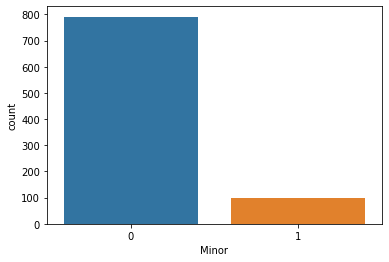

In [23]:
sns.countplot(x='Minor',data=df)

In [24]:
#Count of Adults
df["Minor"].loc[df["Minor"] == 0].count()

791

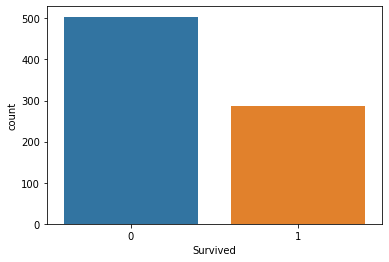

In [25]:
sns.countplot(x='Survived',data=df.loc[df["Minor"] == 0])

In [26]:
#Count of Minors
df["Minor"].loc[df["Minor"] == 1].count()

100

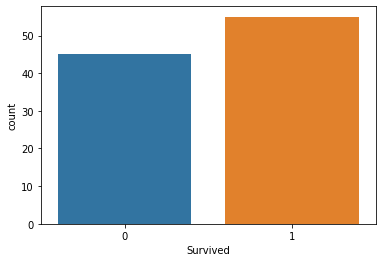

In [27]:
sns.countplot(x='Survived',data=df.loc[df["Minor"] == 1])

We can observe that our <b><i>Hypothesis 2</i></b> is true.

Let's visualize the travel class of the passengers

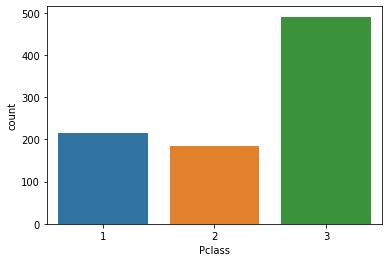

In [28]:
sns.countplot(x='Pclass',data=df)

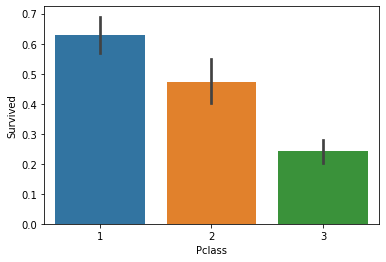

In [29]:
sns.barplot('Pclass', 'Survived', data=df)

We can observe that our <b><i>Hypothesis 3</i></b> is true.

### FEATURE ENGINEERING

In [30]:
#Create Categorical variables for Sex
df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)

In [31]:
#Create Categorical variables for Embark
df['Embarked'] = pd.get_dummies(df['Embarked'],drop_first=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0


We know that PassengerID, Name, Ticket, Cabin wouldn't help with model building, so let's drop those columns

In [33]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

### MODEL BUILDING

Let's build a logistic regression model

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Minor
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,0
4,0,3,1,35.0,0,0,8.0500,0,0


In [35]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
logmodel.score(X_train,y_train)

0.8138041733547352

In [39]:
logmodel.score(X_test,y_test)

0.7835820895522388